# RIT DSCI-633: Foundations of Data Science and Analytics
## Assignment 4
### Due: 11:59 pm EST, Saturday, Nov 13, 2021

### Problem 1 (8 points)

Consider the data set shown in the table below.

| Customer ID | Transaction ID | Items Bought |
| :--- | :--- | :--- |
| 1 | 0001 | {a, d, e} |
| 1 | 0024 | {a,b,c,e} |
| 2 | 0012 | {a,b,d,e} |
| 2 | 0031 | {a,c,d,e} |
| 3 | 0015 | {b, c, e} |
| 3 | 0022 | {b, d, e} |
| 4 | 0029 | {c, d} |
| 4 | 0040 | {a, b, c} |
| 5 | 0033 | {a, d, e} |
| 5 | 0038 | {a, b, e} |


**1.1**. Compute the support for itemsets {e}, {c,d}, and {c,d,e} by treating each transaction ID as a market basket.

**1.2**. Compute the confidence for the association rules {c,d} --> {e} and {e} --> {c,d}. Is confidence a symmetric measure?

**1.3**. Repeat part 1 of this question by treating each customer ID as a market basket. Each item should be treated as a binary variable (1 if an item appears in at least one transaction bought by the customer, and 0 otherwise.) 

**1.4**. Use the results in part 3 to compute the confidence for the association rules {c, d} --> {e} and {e} --> {c, d}.




### Solution

#### Solution 1.1

S({e}) = 8/10 = 0.8 <br>
S({c,d}) = 2/10 = 0.2 <br>
S({c,d,e}) = 1/10 = 0.1 <br>

#### Solution 1.2

Confidence is not a symmetric measure <br>
C(cd −→ e) = 0.1/0.2 = 50% <br>
C(e −→ cd) = 0.1/0.8 = 12.5%

#### Solution 1.3

S({e}) = 4/5 = 0.8 <br>
S({c,d}) = 4/5 = 0.8 <br>
S({c,d,e}) = 3/5 = 0.6 <br>

#### Solution 1.4

C(cd −→ e) = 0.6/0.8 = 75% <br>
C(e −→ cd) = 0.6/0.8 = 75%

### Problem 2 (15 points)

Consider the market basket transactions shown in the table below.

| Transaction ID | Items Bought |
| :--- | :--- |
| 1 | {Milk, Beer, Diapers} |
| 2 | {Bread, Butter, Milk} |
| 3 | {Milk, Diapers, Cookies} |
| 4 | {Bread, Butter, Cookies} |
| 5 | {Beer, Cookies, Diapers} |
| 6 | {Milk, Diapers, Bread, Butter, Soda} |
| 7 | {Bread, Butter, Diapers} |
| 8 | {Beer, Diapers, Soda} |
| 9 | {Milk, Diapers, Bread, Butter} |
| 10 | {Beer, Cookies} |


**2.1**.	What is the maximum number of association rules that can be extracted from this data (including rules that have zero support)?

**2.2**.	What is the maximum size of frequent itemset that can be extracted (assuming minsup > 0)?

**2.3**.	What is the maximum number of size-1, size-2 and size-3 itemsets that can be derived from this data set ?

**2.4**.	Find all itemsets of size 2 or larger that have support > 0.5.

**2.5**.	Find a pair of items, a and b, such that the rules {a} --> {b} and {b} --> {a} have the same confidence.

### Solution

#### Solution 2.1

R =(3^d)−2^(d+1)+1 <br>
we have 7 different items - Milk, Beer, Diapers, Bread, Butter, Cookies, Soda <br>
R = 3^7 - 2^8 + 1 <br>
1932 rules

#### Solution 2.2

5 (its the size of the largest item set in the data, in this case entry 6 has the largest size at 5)

#### Solution 2.3

Size 1 = 7C1 = 7 <br>
Size 2 = 7C2 = 21 <br>
Size 3 = 7C3 = 35

#### Solution 2.4

In [10]:
import itertools
Item_list = [{'Milk', 'Beer', 'Diapers'}, {'Bread', 'Butter', 'Milk'}, {'Milk', 'Diapers', 'Cookies'}, {'Bread', 'Butter', 'Cookies'}, {'Beer', 'Cookies', 'Diapers'}, {'Milk', 'Diapers', 'Bread', 'Butter', 'Soda'}, {'Bread', 'Butter', 'Diapers'}, {'Beer', 'Diapers', 'Soda'}, {'Milk', 'Diapers', 'Bread', 'Butter'}, {'Beer', 'Cookies'}]
Items = {'Milk', 'Beer', 'Diapers', 'Bread', 'Butter', 'Soda', 'Cookies'}
out = []
for L in range(2, len(Items)+1):
    for subset in itertools.combinations(Items, L):
        count = 0
        subset = set(subset)
        for item in Item_list:
            if(subset.issubset(item)):
                count +=1
        if count >=5:
            out.append(subset)
print(out)

[{'Butter', 'Bread'}]


#### Solution 2.5

Bread and butter and the same confidence (they never appear whithout each other)

### Problem 3 (12 points)

We would like to find frequent itemsets in the dataset given in Problem 1. Assuming minsup = 30%, i.e., any itemset occurring in 3 or more transactions is considered to be frequent. 

**3.1**.	Draw the itemset lattice for this dataset.

**3.2**. List (or mark in the itemset lattice) all the frequent itemsets.  What is the percentage of frequent itemsets (with respect to all itemsets in the lattice)?

**3.3**. List the itemsets that are maximal frequent

**3.4**. List the itemsets that are closed

**Extra Credit (3 points):** Show the steps and intermediate results of the Apriori algorithm on this dataset to iteratively find candidate itemsets of size (k+1) from the frequent itemsets of size k, and prune those that are not frequent.

### Solution

#### Solution 3.1

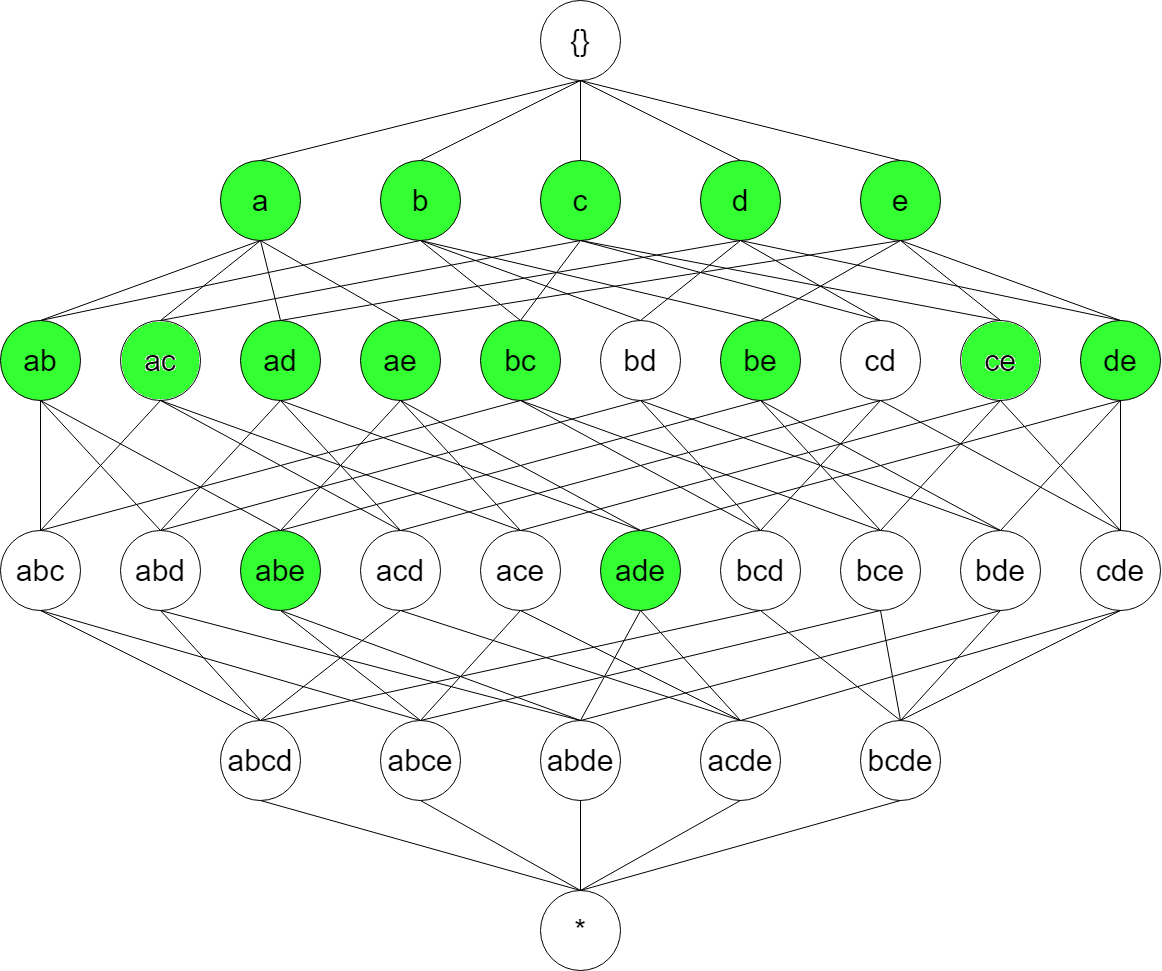

Green nodes are frequent (\*have not marked empty set as frequent as we ignore it)

#### Solution 3.2

In [6]:
import itertools
data = [{'a', 'd', 'e'}, {'a','b','c','e'}, {'a','b','d','e'}, {'a','c','d','e'}, {'b', 'c', 'e'}, {'b', 'd', 'e'}, {'c', 'd'}, {'a', 'b', 'c'}, {'a', 'd', 'e'}, {'a', 'b', 'e'}]
base = {'a', 'b', 'c', 'd', 'e'}
out = []
for L in range(0, len(base)+1):
    for subset in itertools.combinations(base, L):
        count = 0
        subset = set(subset)
        for item in data:
            if(subset.issubset(item)):
                count +=1
        if count >=3:
            out.append(subset)
print(out)
#ignoring empty set in count
print((len(out)-1)/32 * 100, "%")


[set(), {'b'}, {'d'}, {'c'}, {'a'}, {'e'}, {'c', 'b'}, {'a', 'b'}, {'b', 'e'}, {'a', 'd'}, {'d', 'e'}, {'c', 'a'}, {'c', 'e'}, {'a', 'e'}, {'a', 'b', 'e'}, {'a', 'd', 'e'}]
46.875 %


#### Solution 3.3

Maximally frequent from lattice - [{a,b,e}, {a,d,e},{a,c}, {b,c}, {c,e}]

#### Solution 3.4

In [16]:
import itertools
data = [{'a', 'd', 'e'}, {'a','b','c','e'}, {'a','b','d','e'}, {'a','c','d','e'}, {'b', 'c', 'e'}, {'b', 'd', 'e'}, {'c', 'd'}, {'a', 'b', 'c'}, {'a', 'd', 'e'}, {'a', 'b', 'e'}]
base = {'a', 'b', 'c', 'd', 'e'}
support = {}
for L in range(1, len(base)+1):
    for subset in itertools.combinations(base, L):
        count = 0
        subset1 = set(subset)
        for item in data:
            if(subset1.issubset(item)):
                count +=1
        support[tuple(sorted(subset))] = count
        


print(support)   
print()

from itertools import chain, combinations

def powerset(iterable):
    "powerset([1,2,3]) --> () (1,) (2,) (3,) (1,2) (1,3) (2,3) (1,2,3)"
    s = list(iterable)
    return chain.from_iterable(combinations(s, r) for r in range(len(s)+1))


temp_list = []

for x in support.keys():
    power_set = list(powerset(x))
    del power_set[0]
    for item in power_set:
        item = tuple(sorted(item))
        if support[x] == support[item] and x != item:
            if item not in temp_list:
                temp_list.append(item)

                
print(temp_list)                
print()

for x in temp_list:
    del support[x]


print("Closed - ")
print(support)
print(len(support))

{('c',): 5, ('d',): 6, ('b',): 6, ('e',): 8, ('a',): 7, ('c', 'd'): 2, ('b', 'c'): 3, ('c', 'e'): 3, ('a', 'c'): 3, ('b', 'd'): 2, ('d', 'e'): 5, ('a', 'd'): 4, ('b', 'e'): 5, ('a', 'b'): 4, ('a', 'e'): 6, ('b', 'c', 'd'): 0, ('c', 'd', 'e'): 1, ('a', 'c', 'd'): 1, ('b', 'c', 'e'): 2, ('a', 'b', 'c'): 2, ('a', 'c', 'e'): 2, ('b', 'd', 'e'): 2, ('a', 'b', 'd'): 1, ('a', 'd', 'e'): 4, ('a', 'b', 'e'): 3, ('b', 'c', 'd', 'e'): 0, ('a', 'b', 'c', 'd'): 0, ('a', 'c', 'd', 'e'): 1, ('a', 'b', 'c', 'e'): 1, ('a', 'b', 'd', 'e'): 1, ('a', 'b', 'c', 'd', 'e'): 0}

[('b', 'd'), ('a', 'd'), ('b', 'c', 'd'), ('a', 'c', 'd'), ('c', 'd', 'e'), ('a', 'b', 'd'), ('a', 'b', 'c', 'd'), ('b', 'c', 'd', 'e')]

Closed - 
{('c',): 5, ('d',): 6, ('b',): 6, ('e',): 8, ('a',): 7, ('c', 'd'): 2, ('b', 'c'): 3, ('c', 'e'): 3, ('a', 'c'): 3, ('d', 'e'): 5, ('b', 'e'): 5, ('a', 'b'): 4, ('a', 'e'): 6, ('b', 'c', 'e'): 2, ('a', 'b', 'c'): 2, ('a', 'c', 'e'): 2, ('b', 'd', 'e'): 2, ('a', 'd', 'e'): 4, ('a', 'b', 'e'

## This is for closed frequent only 
All item sets that are Maximally frequent are also closed so we can start with <br>
[{a,b,e}, {a,d,e}, {b,c}]. now we need to look for all the nodes 

that do not have the same support as their supersets <br>

{a} is closed
{b} is closed
{c} is closed
{d} is closed
{e} is closed

{a,b} is closed
{a,c} is closed (Maximal)
{a,d} is not closed due to {a,d,e}
{a,e} is closed
{b,c} is closed (Maximal)
{b,e} is closed
{c,e} is closed (Maximal)
{d,e} is closed

{a,b,e} and {a,d,e} are closed (Maximal)

final - [{a}, {c}, {d}, {e}, {a,b}, {a,e}, {b,c}, {b,e}, {d,e}, {a,b,e}, {a,d,e}]

### Extra credit 

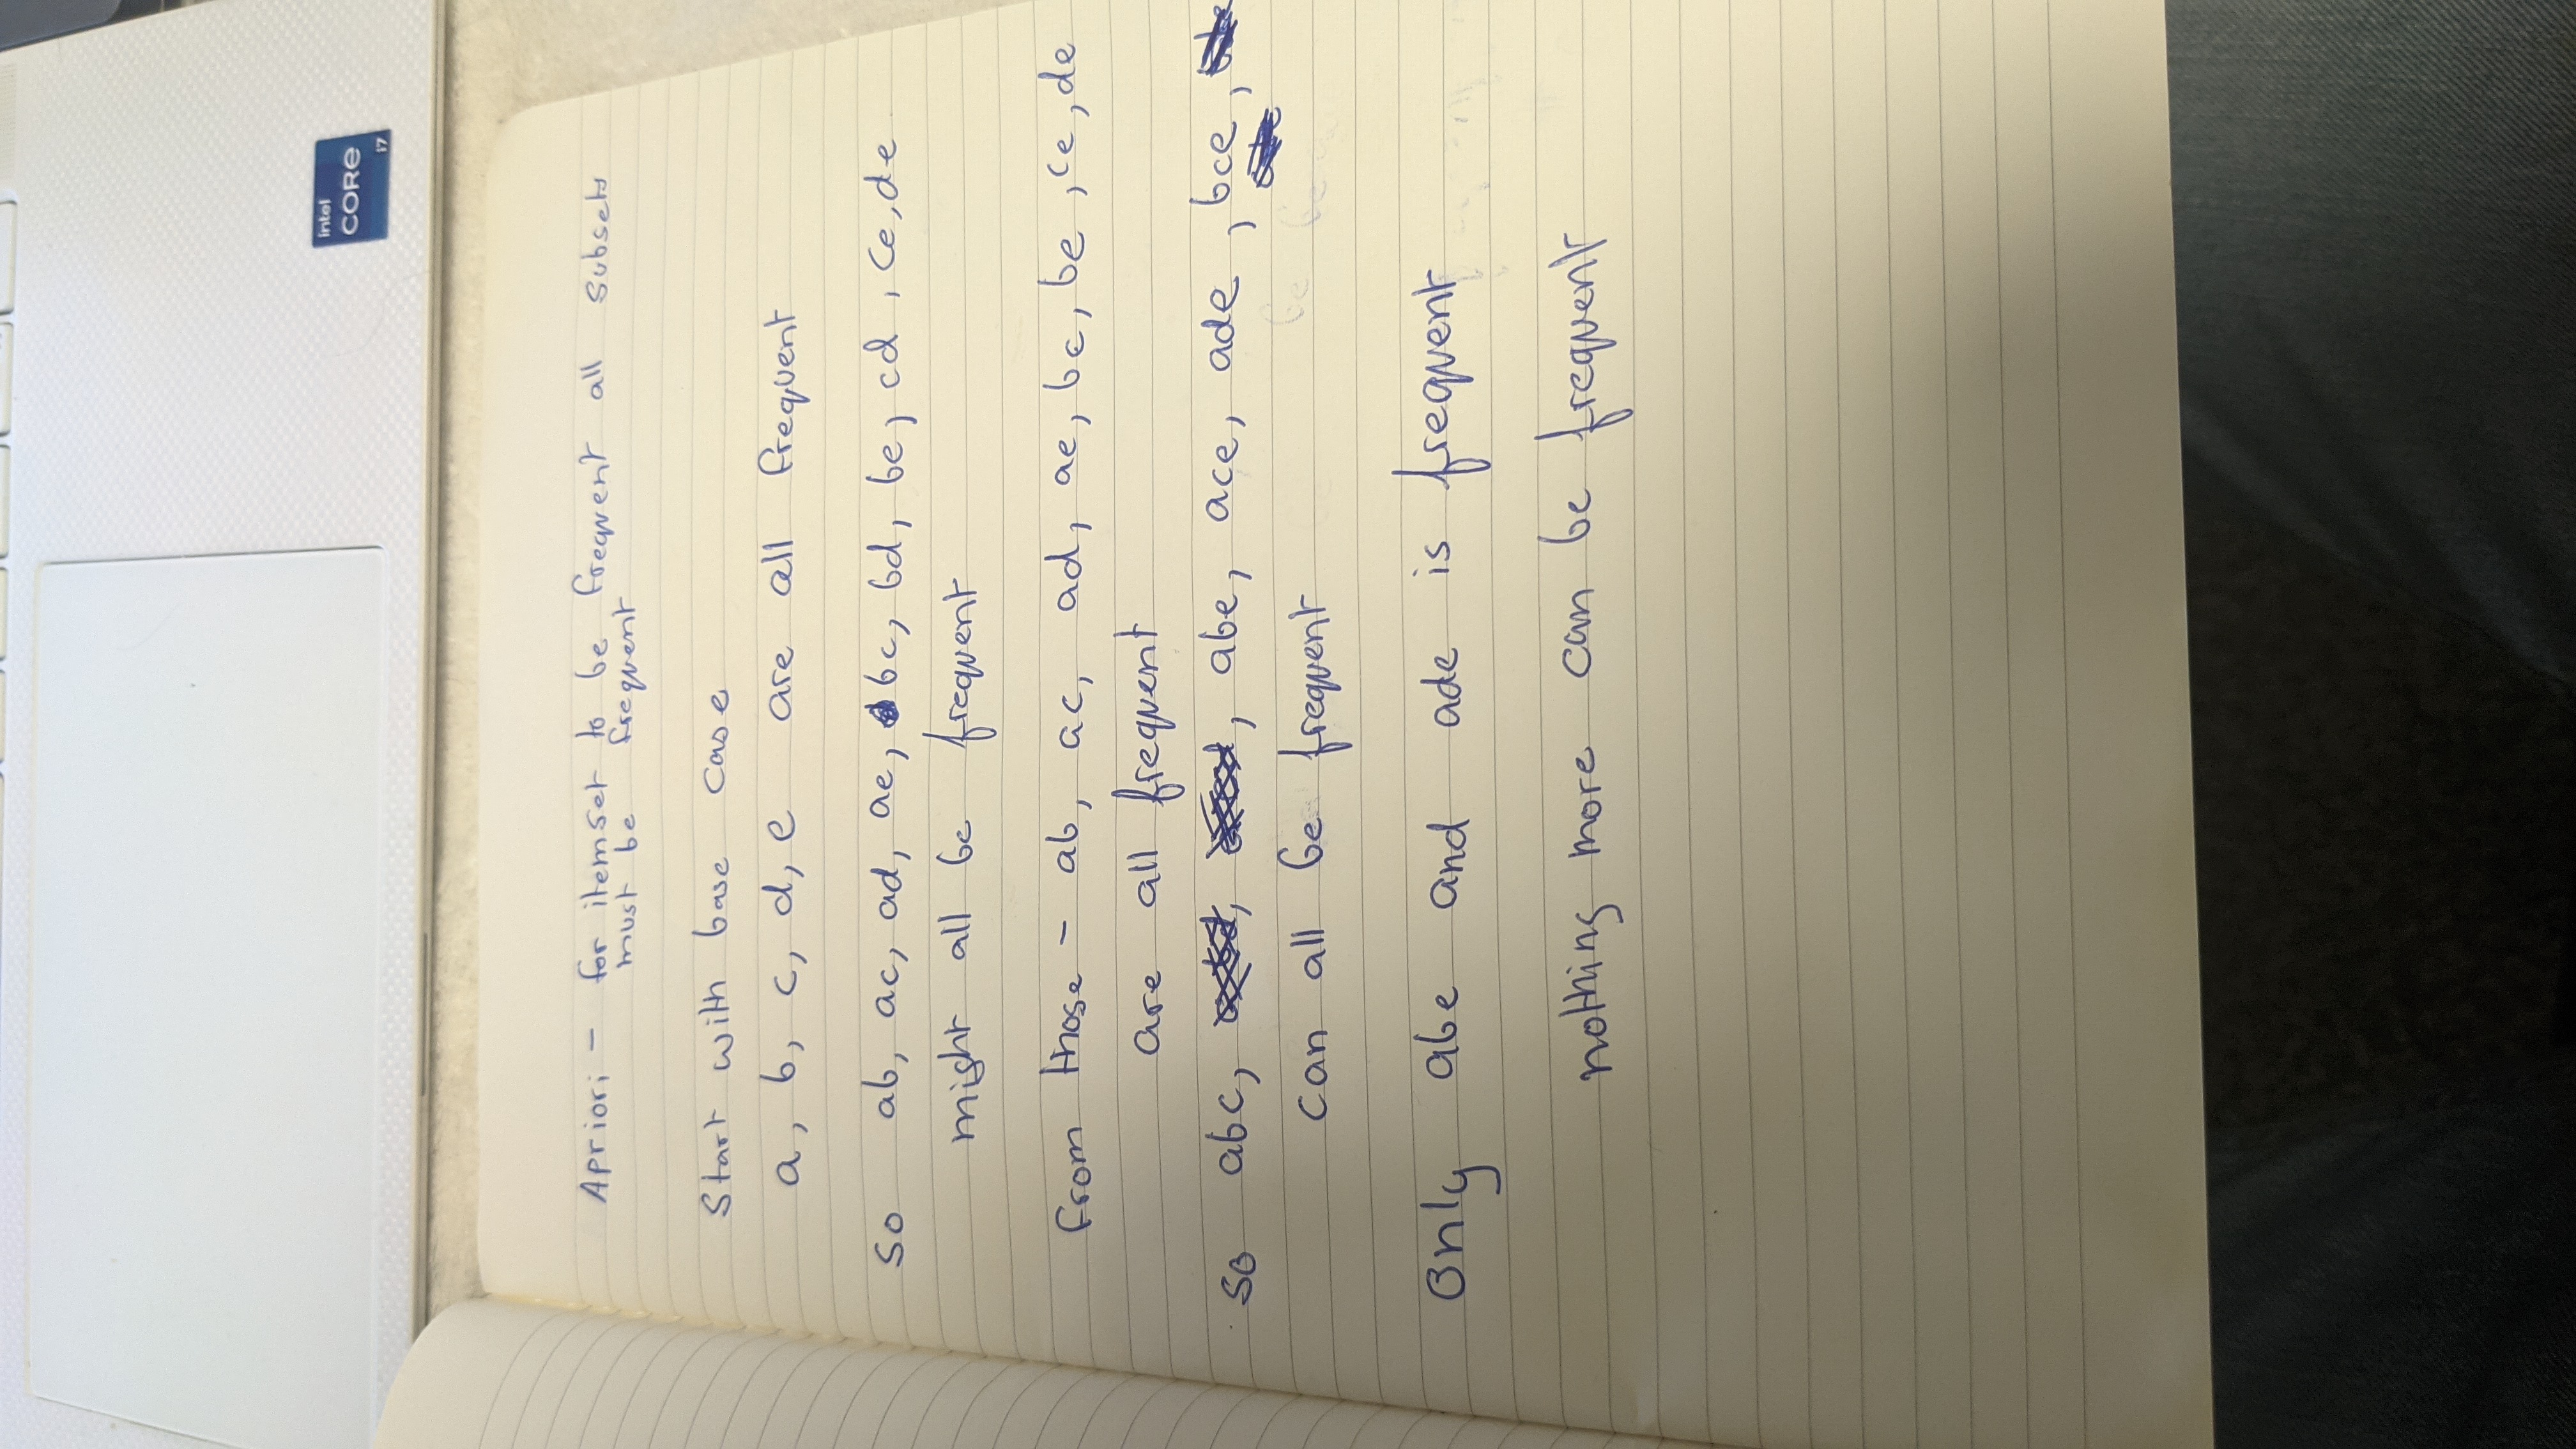

### Problem 4 (10 points)

The original association rule mining formulation uses the support and confidence measures to prune uninteresting rules. 

**4.1**. Draw a contingency table for each of the following rules using the transactions shown in the table in Problem 1.

Rules: {b} --> {c}, {a} --> {d}, {b} --> {d}, {e} --> {c}, {c} --> {a}. 

**4.2**. Use the contingency tables in part (a) to compute and rank the rules in decreasing order according to the following measures: (i)	Support (ii)	Confidence (iii)	Interest (X --> Y) = P(X,Y) / (P(Y). P(X))



### Solution

#### Solution 4.1

For {b} --> {c}    
     
     |  C  |  C̅  |
    B|  3  |  3  |
    -------+-----|
    B̅|  2  |  2  |
    -------+-----+----
     |  5  |  5  | 10
     
     
For {a} --> {d}

     
     |  D  |  D̅  |
    A|  4  |  3  |
    -------+-----|
    A̅|  2  |  1  |
    -------+-----+----
     |  6  |  4  | 10
     
   
For {b} --> {d}

     
     |  D  |  D̅  |
    B|  2  |  4  |
    -------+-----|
    B̅|  4  |  0  |
    -------+-----+----
     |  6  |  4  | 10
  
  
For {e} --> {c}
     
     |  C  |  C̅  |
    E|  3  |  5  |
    -------+-----|
    E̅|  2  |  0  |
    -------+-----+----
     |  5  |  5  | 10
     
  
For {c} --> {a}

     |  A  |  A̅  |
    C|  3  |  2  |
    -------+-----|
    C̅|  4  |  1  |
    -------+-----+----
     |  7  |  3  | 10


#### Solution 4.2

| Relation    | Support     | Confidence | Interest    |
| ----------- | ----------- |----------- |-------------|
| {b} --> {c} | 0.3   (2)   |  0.5    (3)|   1      (2)| 
| {a} --> {d} | 0.4   (1)   |  0.5714 (2)|   0.9524 (3)|
| {b} --> {d} | 0.2   (3)   |  0.3333 (5)|   0.5556 (5)|
| {e} --> {c} | 0.3   (2)   |  0.375  (4)|   0.75   (4)|
| {c} --> {a} | 0.3   (2)   |  0.6    (1)|   1.2    (1)|


### Submission instructions

1. Your assignment should be completed by filling in the empty solution cells in this Jupyter notebook file (.ipynb). Feel free to add more cells as needed.

2. Some questions may require showing work done by hand. Feel free to take a picture of your work, and either submit as an additional document along with the notebook, or store it on your RIT Google Drive folder and link to it from the notebook.

3. Please comment your code using either markdown or #comments and use meaningful variable names to make it as readable and intelligible as possible.

4. Write your code in the form of functions. For example: 

    def my_code ():

          #Write code here
      
          return "The return value"
          

5. If the problem is to find the value of 'x', printing 'x = (your answer)' will help us identify if your code worked.


6. For code that refers to local data files downloaded from the internet, please keep the file path simple (e.g. ~/downloads/datafilename) so that it works on our copy of the dataset. Please do not modify either the filename or the file contents in any way.

7. Solution to problems that do not require any coding can be typed up in their own cells using markdown.
    
8. Unless there are legitimate circumstances, late assignments will not be accepted.

9. All assignments are individual.

10. All the sources used for problem solution must be acknowledged, e.g. web sites, books, research papers, etc.

11. Academic integrity is taken seriously; for detailed information see the RIT Honor Code and with RIT's Academic Integrity Policy.

Karan Shishoo